# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

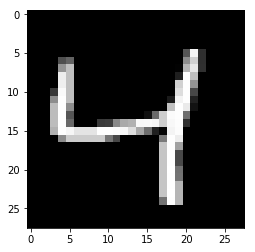

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6938
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6863
Epoch: 1/20... Training loss: 0.6813
Epoch: 1/20... Training loss: 0.6760
Epoch: 1/20... Training loss: 0.6713
Epoch: 1/20... Training loss: 0.6598
Epoch: 1/20... Training loss: 0.6550
Epoch: 1/20... Training loss: 0.6470
Epoch: 1/20... Training loss: 0.6327
Epoch: 1/20... Training loss: 0.6209
Epoch: 1/20... Training loss: 0.6097
Epoch: 1/20... Training loss: 0.5936
Epoch: 1/20... Training loss: 0.5805
Epoch: 1/20... Training loss: 0.5648
Epoch: 1/20... Training loss: 0.5514
Epoch: 1/20... Training loss: 0.5335
Epoch: 1/20... Training loss: 0.5213
Epoch: 1/20... Training loss: 0.5029
Epoch: 1/20... Training loss: 0.4802
Epoch: 1/20... Training loss: 0.4639
Epoch: 1/20... Training loss: 0.4479
Epoch: 1/20... Training loss: 0.4358
Epoch: 1/20... Training loss: 0.4287
Epoch: 1/20... Training loss: 0.4112
Epoch: 1/20... Training loss: 0.3954
Epoch: 1/20... Training loss: 0.3844
E

Epoch: 1/20... Training loss: 0.2019
Epoch: 1/20... Training loss: 0.2011
Epoch: 1/20... Training loss: 0.2044
Epoch: 1/20... Training loss: 0.2006
Epoch: 1/20... Training loss: 0.2060
Epoch: 1/20... Training loss: 0.2010
Epoch: 1/20... Training loss: 0.2035
Epoch: 1/20... Training loss: 0.2015
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1955
Epoch: 1/20... Training loss: 0.2067
Epoch: 1/20... Training loss: 0.2173
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.2027
Epoch: 1/20... Training loss: 0.2025
Epoch: 1/20... Training loss: 0.2055
Epoch: 1/20... Training loss: 0.1974
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.2096
Epoch: 1/20... Training loss: 0.1987
Epoch: 1/20... Training loss: 0.2104
Epoch: 1/20... Training loss: 0.2005
Epoch: 1/20... Training loss: 0.2033
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.2003
Epoch: 1/20... Training loss: 0.1947
E

Epoch: 2/20... Training loss: 0.1640
Epoch: 2/20... Training loss: 0.1677
Epoch: 2/20... Training loss: 0.1698
Epoch: 2/20... Training loss: 0.1718
Epoch: 2/20... Training loss: 0.1691
Epoch: 2/20... Training loss: 0.1672
Epoch: 2/20... Training loss: 0.1648
Epoch: 2/20... Training loss: 0.1625
Epoch: 2/20... Training loss: 0.1659
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1667
Epoch: 2/20... Training loss: 0.1673
Epoch: 2/20... Training loss: 0.1697
Epoch: 2/20... Training loss: 0.1701
Epoch: 2/20... Training loss: 0.1659
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1691
Epoch: 2/20... Training loss: 0.1655
Epoch: 2/20... Training loss: 0.1690
Epoch: 2/20... Training loss: 0.1647
Epoch: 2/20... Training loss: 0.1679
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1643
Epoch: 2/20... Training loss: 0.1678
Epoch: 2/20... Training loss: 0.1656
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1607
E

Epoch: 3/20... Training loss: 0.1518
Epoch: 3/20... Training loss: 0.1451
Epoch: 3/20... Training loss: 0.1500
Epoch: 3/20... Training loss: 0.1448
Epoch: 3/20... Training loss: 0.1418
Epoch: 3/20... Training loss: 0.1446
Epoch: 3/20... Training loss: 0.1438
Epoch: 3/20... Training loss: 0.1491
Epoch: 3/20... Training loss: 0.1490
Epoch: 3/20... Training loss: 0.1464
Epoch: 3/20... Training loss: 0.1495
Epoch: 3/20... Training loss: 0.1444
Epoch: 3/20... Training loss: 0.1507
Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1506
Epoch: 3/20... Training loss: 0.1463
Epoch: 3/20... Training loss: 0.1469
Epoch: 3/20... Training loss: 0.1463
Epoch: 3/20... Training loss: 0.1502
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1450
Epoch: 3/20... Training loss: 0.1455
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1495
Epoch: 3/20... Training loss: 0.1455
Epoch: 3/20... Training loss: 0.1455
E

Epoch: 4/20... Training loss: 0.1331
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1334
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1327
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1314
Epoch: 4/20... Training loss: 0.1308
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1350
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1358
Epoch: 4/20... Training loss: 0.1312
Epoch: 4/20... Training loss: 0.1298
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1303
Epoch: 4/20... Training loss: 0.1315
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1334
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1313
E

Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1203
E

Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1165
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1125
E

Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1129
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1115
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1109
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1092
E

Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1042
E

Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0997
E

Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0987
E

Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0955
E

Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0993
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0899
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0897
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0998
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0892
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0992
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0906
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0889
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

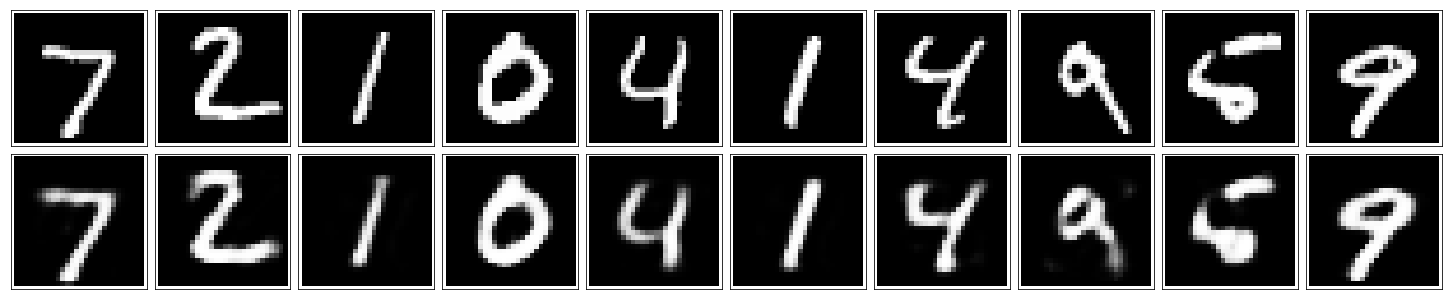

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.